In [1]:
#Shubham Tribedi | 1811100002037

## Target guided encodings

In the previous lectures in this section, we learned how to convert a label into a number, by using one hot encoding, replacing by a digit or replacing by frequency or counts of observations. These methods are simple, make (almost) no assumptions and work generally well in different scenarios.

There are however methods that allow us to capture information while pre-processing the labels of categorical variables. These methods include:

- Ordering the labels according to the target
- Replacing labels by the target mean (mean encoding / target encoding)
- Replacing the labels by the probability ratio of the target being 1 or 0
- Weight of evidence.

All of the above methods have something in common:

- the encoding is **guided by the target**, and
- they create a **monotonic relationship** between the variable and the target.


### Monotonicity

A monotonic relationship is a relationship that does one of the following:

- (1) as the value of one variable increases, so does the value of the other variable; or
- (2) as the value of one variable increases, the value of the other variable decreases.

In this case, as the value of the independent variable (predictor) increases, so does the target, or conversely, as the value of the variable increases, the target value decreases.



### Advantages of target guided encodings

- Capture information within the category, therefore creating more predictive features
- Create a monotonic relationship between the variable and the target, therefore suitable for linear models
- Do not expand the feature space


### Limitations

- Prone to cause over-fitting
- Difficult to cross-validate with current libraries


### Note

The methods discussed in this can be also used on numerical variables, after discretisation. This creates a monotonic relationship between the numerical variable and the target, and therefore improves the performance of linear models.

===============================================================================

## Mean Encoding or Target Encoding

Mean encoding implies replacing the category by the average target value for that category. For example, if we have the variable city, with categories London, Manchester and Bristol, and we want to predict the default rate, if the default rate for London is 30% we replace London by 0.3, if the default rate for Manchester is 20% we replace Manchester by 0.2 and so on.


## In this assignment:

You have to perform one hot encoding with:
- pandas
- Feature-Engine

And the advantages and limitations of each implementation using the Titanic dataset.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

# for encoding with feature-engine
from feature_engine.encoding import MeanEncoder

In [3]:
# load dataset

data = pd.read_csv(
    'TitanicRawDataset.csv',
    usecols=['cabin', 'sex', 'embarked', 'survived'])

data.head()

,survived,sex,cabin,embarked
0,1,female,B5,S
1,1,male,C22 C26,S
2,0,female,C22 C26,S
3,0,male,C22 C26,S
4,0,female,C22 C26,S


In [4]:
# let's fill na in embarked
data['embarked'].fillna('Missing',inplace=True)

In [5]:
# Now we extract the first letter of the cabin
# to create a simpler variable for the demo
data['cabin']=data['cabin'].astype(str).str[0]
data.head()

,survived,sex,cabin,embarked
0,1,female,B,S
1,1,male,C,S
2,0,female,C,S
3,0,male,C,S
4,0,female,C,S


In [6]:
# let's have a look at how many labels each variable has
for i in data:
    print(i,':',len(data[i].unique()),'labels')

survived : 2 labels
sex : 2 labels
cabin : 9 labels
embarked : 4 labels


In [7]:
# let's explore the unique categories for cabin, sex and embarked
data.cabin.unique()

array(['B', 'C', 'E', 'D', 'A', '?', 'T', 'F', 'G'], dtype=object)

In [8]:
data.sex.unique()

array(['female', 'male'], dtype=object)

In [9]:
data.embarked.unique()

array(['S', 'C', '?', 'Q'], dtype=object)

### Encoding important

We calculate the target mean per category using the train set, and then use those mappings in the test set.



In [10]:
# let's separate into training and testing set
X_train,X_test=train_test_split(data,test_size=0.3)

X_train.shape, X_test.shape

((916, 4), (393, 4))

### Explore original relationship between categorical variables and target

<AxesSubplot:xlabel='embarked', ylabel='Mean Survival'>

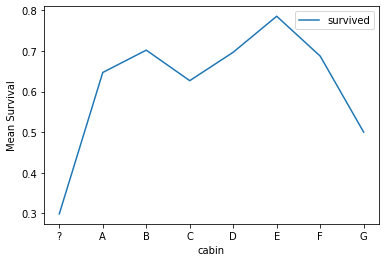

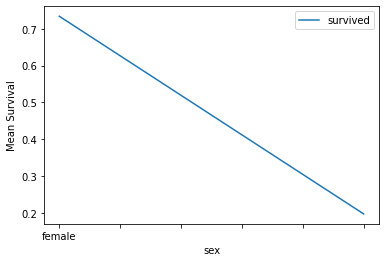

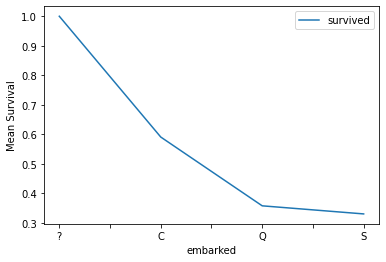

In [11]:
# let's explore the relationship of the categories with the target

X_train[['cabin','survived']].groupby('cabin').mean().plot.line(ylabel='Mean Survival')
X_train[['sex','survived']].groupby('sex').mean().plot.line(ylabel='Mean Survival')
X_train[['embarked','survived']].groupby('embarked').mean().plot.line(ylabel='Mean Survival')

You can see that the relationship between the target and cabin and embarked goes up and down, depending on the category.


## Mean encoding with pandas


### Advantages

- quick
- returns pandas dataframe

### Limitations of pandas:

- it does not preserve information from train data to propagate to test data

We need to store the mappings separately if planning to use the model in production.

In [12]:
# let's calculate the mean target value per category for cabin
print(X_train.groupby('cabin').mean())

       survived
cabin          
?      0.298295
A      0.647059
B      0.702128
C      0.626866
D      0.696970
E      0.785714
F      0.687500
G      0.500000


In [13]:
# and now let's do the same but capturing the result in a dictionary

cabindict=dict(zip(list(X_train.groupby('cabin').mean().index),list(X_train.groupby('cabin').mean()['survived'])))

cabindict

{'?': 0.29829545454545453,
 'A': 0.6470588235294118,
 'B': 0.7021276595744681,
 'C': 0.6268656716417911,
 'D': 0.696969696969697,
 'E': 0.7857142857142857,
 'F': 0.6875,
 'G': 0.5}

In [14]:
# now, we replace the labels with the target means
X_train['cabin']=X_train['cabin'].replace(to_replace=list(cabindict.keys()),value=list(cabindict.values()))


<ipython-input-14-39b49662598b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['cabin']=X_train['cabin'].replace(to_replace=list(cabindict.keys()),value=list(cabindict.values()))


In [15]:
# let's explore the result

X_train['cabin'].head(10)

713    0.298295
551    0.298295
973    0.298295
667    0.298295
552    0.298295
613    0.298295
122    0.702128
628    0.298295
749    0.298295
673    0.298295
Name: cabin, dtype: float64

In [16]:
# and now we run a loop over the remaining categorical variables


cabindict=dict(zip(list(X_train.groupby('sex').mean().index),list(X_train.groupby('sex').mean()['survived'])))
X_train['sex']=X_train['sex'].replace(to_replace=list(cabindict.keys()),value=list(cabindict.values()))

cabindict=dict(zip(list(X_train.groupby('embarked').mean().index),list(X_train.groupby('embarked').mean()['survived'])))
X_train['embarked']=X_train['embarked'].replace(to_replace=list(cabindict.keys()),value=list(cabindict.values()))

<ipython-input-16-10001cf425fc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['sex']=X_train['sex'].replace(to_replace=list(cabindict.keys()),value=list(cabindict.values()))
<ipython-input-16-10001cf425fc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['embarked']=X_train['embarked'].replace(to_replace=list(cabindict.keys()),value=list(cabindict.values()))


In [17]:
# let's see the result

X_train.head()

,survived,sex,cabin,embarked
713,0,0.197302,0.298295,0.357143
551,1,0.733746,0.298295,0.329705
973,0,0.197302,0.298295,0.329705
667,0,0.733746,0.298295,0.357143
552,0,0.197302,0.298295,0.329705


<AxesSubplot:xlabel='embarked', ylabel='Mean Survival'>

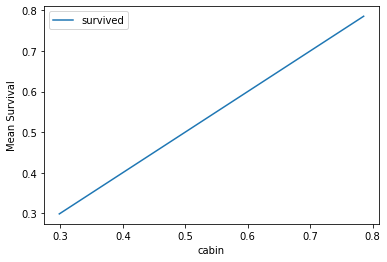

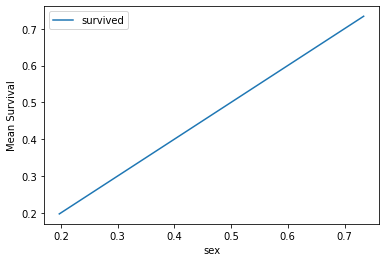

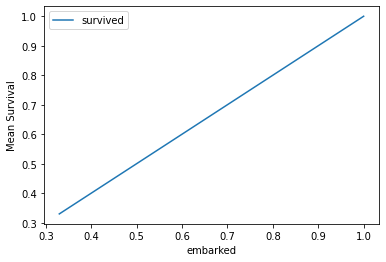

In [18]:
# let's inspect the newly created monotonic relationship
# between the variables and the target
X_train[['cabin','survived']].groupby('cabin').mean().plot.line(ylabel='Mean Survival')
X_train[['sex','survived']].groupby('sex').mean().plot.line(ylabel='Mean Survival')
X_train[['embarked','survived']].groupby('embarked').mean().plot.line(ylabel='Mean Survival')


Mean Encoding creates linear relationships between the mean target and the categories.

### Note

Replacing categorical labels with this code and method will generate missing values for categories present in the test set that were not seen in the training set. Therefore it is extremely important to handle rare labels before-hand.

## Mean Encoding with Feature-Engine

If using Feature-Engine, instead of pandas, we do not need to keep the target variable in the training dataset.

In [19]:
# let's separate into training and testing set

X_train,X_test,Y_train,Y_test=train_test_split(data[['sex','cabin','embarked']],data['survived'],test_size=0.3)

X_train.shape, X_test.shape

((916, 3), (393, 3))

In [20]:
mean_enc=MeanEncoder().fit(X_train,Y_train)
X_train = mean_enc.transform(X_train)
X_test = mean_enc.transform(X_test)

# let's explore the result
X_train.head()

,sex,cabin,embarked
1169,0.183986,0.300709,0.341121
93,0.183986,0.470588,0.341121
967,0.744681,0.300709,0.341121
320,0.183986,0.626866,0.341121
365,0.744681,0.300709,0.341121


**Note**

If the argument variables is left to None, then the encoder will automatically identify all categorical variables. Is that not sweet?

The encoder will not encode numerical variables. So if some of your numerical variables are in fact categories, you will need to re-cast them as object before using the encoder.

Finally, if there is a label in the test set that was not present in the train set, the encoder will through and error, to alert you of this behaviour.